In [172]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import wavfile
import IPython.display as IPD
matplotlib.rcParams['figure.figsize'] = (16, 10)

In [112]:
cv_res = []
for i  in range(5):
    res = pd.read_csv("cv/VGG1D/2017_12_27_03_58_13_VGG1D_augmented/fold_{}_test.csv".format(i))
    cv_res.append(res)

In [113]:
miss = cv_res[0][cv_res[0].plnum != np.argmax(cv_res[0].iloc[:, -12:].values, axis=1)]

In [114]:
miss.index = range(len(miss))
predict = pd.Series(miss.iloc[:, -12:].idxmax(axis=1), name="predict")
predict_max_probs = pd.Series(np.max(miss.iloc[:, -12:], axis=1), name="max_prob")
miss = pd.concat([miss, predict, predict_max_probs], axis=1, )
prob_sorted = miss.sort_values(by="max_prob")

In [115]:
pd.crosstab(miss.possible_label, miss.predict)

predict,down,go,left,no,off,on,right,silence,stop,unknown,up,yes
possible_label,,,,,,,,,,,,
down,0,35,2,14,1,4,1,16,6,43,3,11
go,47,0,1,96,3,2,3,7,4,41,5,4
left,3,0,0,3,0,0,14,5,2,11,7,26
no,15,83,9,0,0,0,3,14,5,36,6,7
off,1,5,5,4,0,12,0,5,6,4,97,2
on,2,7,1,8,40,0,4,9,1,60,12,0
right,0,3,26,4,1,6,0,13,7,35,1,11
silence,3,4,8,9,1,4,4,0,7,3,11,4
stop,13,19,5,4,11,11,3,9,0,35,14,7


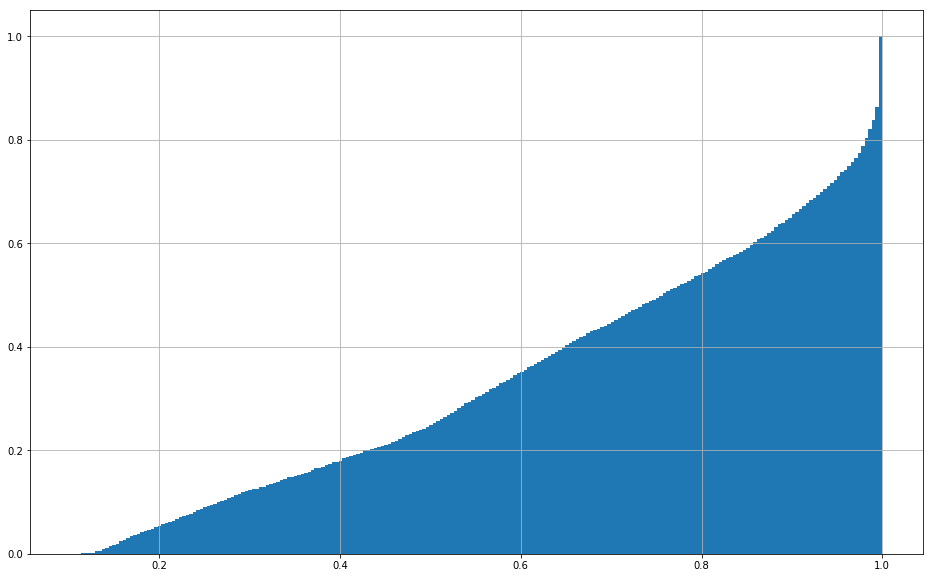

In [116]:
prob_sorted.max_prob.hist(cumulative=True, normed=1, bins=233)

In [117]:
prob_sorted[prob_sorted.predict == "unknown"].head(100)

,is_valid,path,plnum,possible_label,uid,yes,no,up,down,left,right,on,off,stop,go,silence,unknown,predict,max_prob
3387,False,data/augment/2017_12_25_00_55_41/mix_random/do...,3,down,977a3be4,3.334282e-02,5.331101e-02,1.539965e-01,3.261801e-02,9.795605e-02,1.173095e-01,3.475065e-02,1.394847e-02,3.119640e-02,1.542485e-01,8.167730e-02,0.195645,unknown,0.195645
1566,False,data/augment/2017_12_25_00_55_41/shift_forward...,8,stop,7014b07e,1.473662e-01,5.899158e-02,3.434107e-02,1.785508e-01,9.787881e-02,2.604103e-02,2.229358e-02,5.974511e-02,7.905714e-02,3.442626e-02,2.060844e-02,0.240700,unknown,0.240700
3846,False,data/augment/2017_12_25_00_55_41/mix_random/ri...,5,right,f8ad3941,1.621388e-02,1.705195e-02,8.015909e-02,9.394307e-03,1.775775e-01,2.558810e-01,8.330809e-02,6.637394e-03,8.801148e-03,9.417881e-03,7.045969e-02,0.265098,unknown,0.265098
1108,False,data/augment/2017_12_25_00_55_41/speed_up/no/5...,1,no,56cd307a,2.928175e-02,6.422063e-02,7.599434e-02,4.119485e-02,1.797222e-01,9.561966e-03,3.744699e-03,6.048279e-02,1.427386e-01,1.260158e-01,3.879298e-04,0.266654,unknown,0.266654
2178,False,data/augment/2017_12_25_00_55_41/pitch_up/stop...,8,stop,7014b07e,1.596916e-01,5.660842e-03,7.221886e-03,9.862455e-03,1.316640e-01,1.947556e-01,6.373235e-02,5.965340e-02,2.595884e-02,6.703175e-02,1.321578e-03,0.273446,unknown,0.273446
2917,False,data/augment/2017_12_25_00_55_41/mix_random/st...,8,stop,71904de3,6.743310e-02,1.832436e-02,5.499826e-02,4.437806e-02,3.307184e-02,1.491002e-01,1.506753e-01,4.769399e-02,5.783872e-02,1.120278e-02,7.921203e-02,0.286071,unknown,0.286071
4277,False,data/augment/2017_12_25_00_55_41/mix_random/si...,10,silence,No User,3.038517e-02,1.815489e-02,1.171548e-01,3.342773e-02,1.758762e-01,3.436202e-02,2.490574e-02,7.245547e-02,5.214041e-02,7.869266e-02,6.877239e-02,0.293673,unknown,0.293673
2910,False,data/augment/2017_12_25_00_55_41/mix_random/st...,8,stop,7014b07e,8.103703e-02,3.949277e-03,6.745758e-03,1.704207e-02,9.051445e-02,9.652412e-02,2.914558e-04,6.778815e-03,2.048329e-01,1.854850e-01,2.769384e-06,0.306796,unknown,0.306796
1111,False,data/augment/2017_12_25_00_55_41/speed_up/no/5...,1,no,56cd307a,1.816410e-03,2.253973e-01,2.505887e-04,1.858897e-01,3.032631e-03,2.467984e-04,3.967398e-04,7.594023e-04,1.399631e-02,2.584885e-01,1.232070e-06,0.309724,unknown,0.309724
2891,False,data/augment/2017_12_25_00_55_41/mix_random/st...,8,stop,6c2dd2d5,6.617297e-02,9.357614e-02,8.973522e-02,1.784567e-02,1.927264e-01,6.320979e-03,6.079191e-03,1.336228e-01,5.275367e-02,2.236916e-02,2.524018e-04,0.318546,unknown,0.318546


In [118]:
def show_sample(row):
    sr, wav = wavfile.read(row.path)
    print("fname: {}\tlabel: {}\tpredict: {}\tprobs: {}".format(row.path, row.possible_label, row.predict, row.max_prob))
    IPD.display(IPD.Audio(wav, rate=sr))

print(len(prob_sorted[prob_sorted.possible_label == "unknown"].head(20).apply(show_sample, axis=1)))

fname: data/augment/2017_12_25_00_55_41/mix_random/nine/5e1b34a6_nohash_0.wav	label: unknown	predict: silence	probs: 0.1164647862315178


fname: data/augment/2017_12_25_00_55_41/mix_random/house/b8897f1c_nohash_0.wav	label: unknown	predict: on	probs: 0.1164909079670906


fname: data/augment/2017_12_25_00_55_41/mix_random/nine/b8897f1c_nohash_0.wav	label: unknown	predict: up	probs: 0.1200433224439621


fname: data/augment/2017_12_25_00_55_41/mix_random/six/fe291fa9_nohash_1.wav	label: unknown	predict: on	probs: 0.1262417882680893


fname: data/augment/2017_12_25_00_55_41/mix_random/marvin/c25a032b_nohash_1.wav	label: unknown	predict: go	probs: 0.12761364877223969


fname: data/augment/2017_12_25_00_55_41/mix_random/three/33f60c62_nohash_2.wav	label: unknown	predict: yes	probs: 0.12938116490840912


fname: data/augment/2017_12_25_00_55_41/mix_random/eight/1657c9fa_nohash_0.wav	label: unknown	predict: yes	probs: 0.13022249937057495


fname: data/augment/2017_12_25_00_55_41/mix_random/four/5efb758c_nohash_1.wav	label: unknown	predict: down	probs: 0.13122913241386416


fname: data/augment/2017_12_25_00_55_41/add_wn/wow/4fe01997_nohash_0.wav	label: unknown	predict: no	probs: 0.13147446513175964


fname: data/augment/2017_12_25_00_55_41/mix_random/seven/9cde5de8_nohash_0.wav	label: unknown	predict: silence	probs: 0.13173359632492065


fname: data/augment/2017_12_25_00_55_41/mix_random/bed/c84f9b5c_nohash_0.wav	label: unknown	predict: yes	probs: 0.1326466053724289


fname: data/augment/2017_12_25_00_55_41/speed_up/one/4fe01997_nohash_0.wav	label: unknown	predict: left	probs: 0.13509368896484375


fname: data/augment/2017_12_25_00_55_41/mix_random/happy/91cdef62_nohash_0.wav	label: unknown	predict: no	probs: 0.13544832170009613


fname: data/augment/2017_12_25_00_55_41/mix_random/six/1993db46_nohash_2.wav	label: unknown	predict: silence	probs: 0.13655033707618713


fname: data/augment/2017_12_25_00_55_41/mix_random/four/4254621e_nohash_0.wav	label: unknown	predict: up	probs: 0.1371830403804779


fname: data/augment/2017_12_25_00_55_41/mix_random/zero/4beff0c5_nohash_0.wav	label: unknown	predict: silence	probs: 0.13720086216926575


fname: data/augment/2017_12_25_00_55_41/mix_random/house/257251e0_nohash_0.wav	label: unknown	predict: off	probs: 0.13755738735198975


fname: data/augment/2017_12_25_00_55_41/mix_random/eight/a996cf66_nohash_0.wav	label: unknown	predict: silence	probs: 0.13783539831638336


fname: data/augment/2017_12_25_00_55_41/mix_random/three/91bed2e0_nohash_0.wav	label: unknown	predict: stop	probs: 0.13873890042304993


fname: data/augment/2017_12_25_00_55_41/mix_random/six/5e1b34a6_nohash_0.wav	label: unknown	predict: left	probs: 0.1388116180896759


20


In [187]:
sr, wav = wavfile.read('data/silence/2017_12_27_15_07_15/simple_slice_{}.wav'.format(i))
wav = wav.astype(np.float32)/np.iinfo(np.int16).max
IPD.display(IPD.Audio((wav*np.iinfo(np.int16).max).astype(np.int16), rate=sr))

IPD.display(IPD.Audio((0.0001*wav*np.iinfo(np.int16).max).astype(np.int16), rate=sr))

/home/iwai/Documents/workspace/kaggle/speech-recognition/env/lib/python3.6/site-packages/IPython/lib/display.py:135: RuntimeWarning: invalid value encountered in true_divide
  scaled = np.int16(data/np.max(np.abs(data))*32767).tolist()


In [177]:
np.abs(wav).max()*0.1

997.70000000000005